### Import of Packages

In [1]:
# Import Python libraries for data manipuation and visualization
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sn
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
  
#load libraries
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipelin

### Import and clean data
- Prepare the data for modeling by performing the following steps:


In [2]:
df = pd.read_csv('ElectricCarData_Clean.csv')
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [3]:
#Drop any rows with missing data.
df.dropna(inplace = True)
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


- There exists no missing value

In [4]:
#Convert the categorical features into dummy variables.
# create dummy variables  
pd.get_dummies(df)

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,Brand_Aiways,Brand_Audi,Brand_BMW,Brand_Byton,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,4.6,233,450,161,5,55480,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,10.0,160,270,167,5,30000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,210,400,181,5,56440,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6.8,180,360,206,5,68040,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,9.5,145,170,168,4,32997,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,5,45000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99,4.5,210,335,258,5,96050,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
100,5.9,200,325,194,5,50000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101,5.1,200,375,232,5,65000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df.columns.to_list()

['Brand',
 'Model',
 'AccelSec',
 'TopSpeed_KmH',
 'Range_Km',
 'Efficiency_WhKm',
 'FastCharge_KmH',
 'RapidCharge',
 'PowerTrain',
 'PlugType',
 'BodyStyle',
 'Segment',
 'Seats',
 'PriceEuro']

In [6]:
#Print a Specific Row of a Pandas Dataframe
df.loc[[77]]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
77,Smart,EQ forfour,12.7,130,95,176,-,No,RWD,Type 2,Hatchback,A,4,22030


#### After examining the data dictionary, it seems all variables are relevant. 

### Descriptive Statistics of the dataset

In [7]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


### Information of the type of data in seach column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 16.1+ KB


### Number of vehicles produced by each brand

In [9]:
companies = df.groupby('Brand').count()
print(companies['Model'].sort_values(ascending = False))

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Kia             5
Porsche         5
Renault         5
BMW             4
Ford            4
Smart           3
Mercedes        3
Opel            3
Hyundai         3
Byton           3
Peugeot         2
Honda           2
Fiat            2
SEAT            1
Sono            1
Polestar        1
Aiways          1
MG              1
Mini            1
Mazda           1
Lucid           1
Lightyear       1
Lexus           1
Jaguar          1
DS              1
Citroen         1
CUPRA           1
Volvo           1
Name: Model, dtype: int64


In [10]:
df.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


#### The closer to 1, the stronger the correlation between these variables.

#### A minus sign means that these 2 variables are negatively correlated, i.e. one decreases with increasing the other and vice versa.


 - TopSpeed_KmH is highly correlated with PriceEuro and also correlated with AccelSec. PriceEuro is the target variables which is highly correlated with TopSpeed_KmH

array([[<AxesSubplot:title={'center':'AccelSec'}>,
        <AxesSubplot:title={'center':'TopSpeed_KmH'}>],
       [<AxesSubplot:title={'center':'Range_Km'}>,
        <AxesSubplot:title={'center':'Efficiency_WhKm'}>],
       [<AxesSubplot:title={'center':'Seats'}>,
        <AxesSubplot:title={'center':'PriceEuro'}>]], dtype=object)

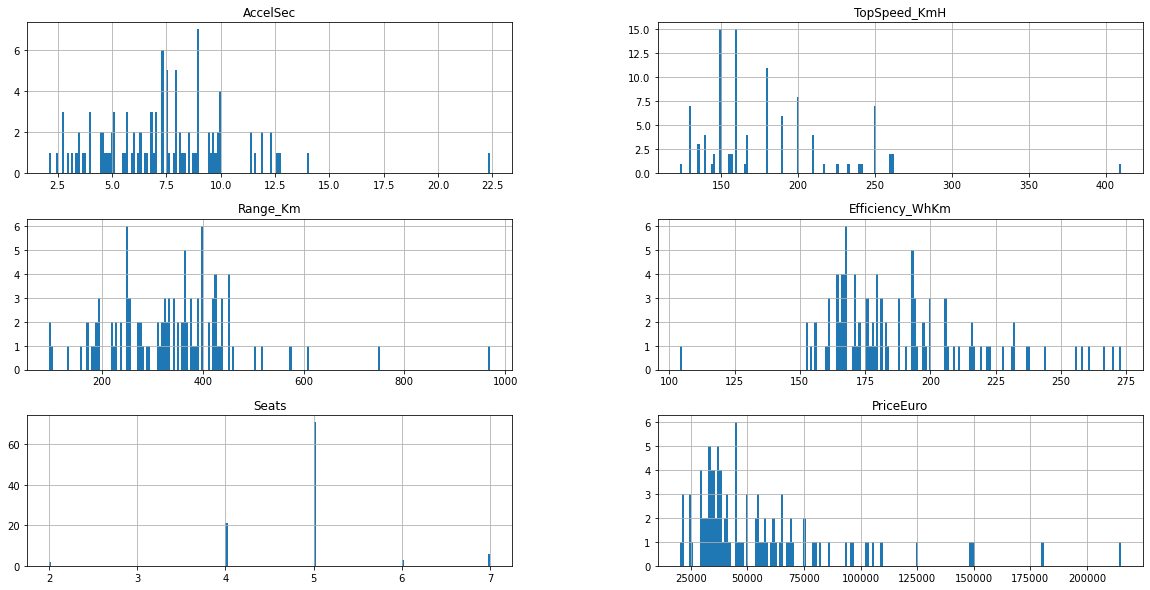

In [11]:
df.hist(bins=200,figsize=[20,10])

### Pairplot of all the columns based on Brand presence

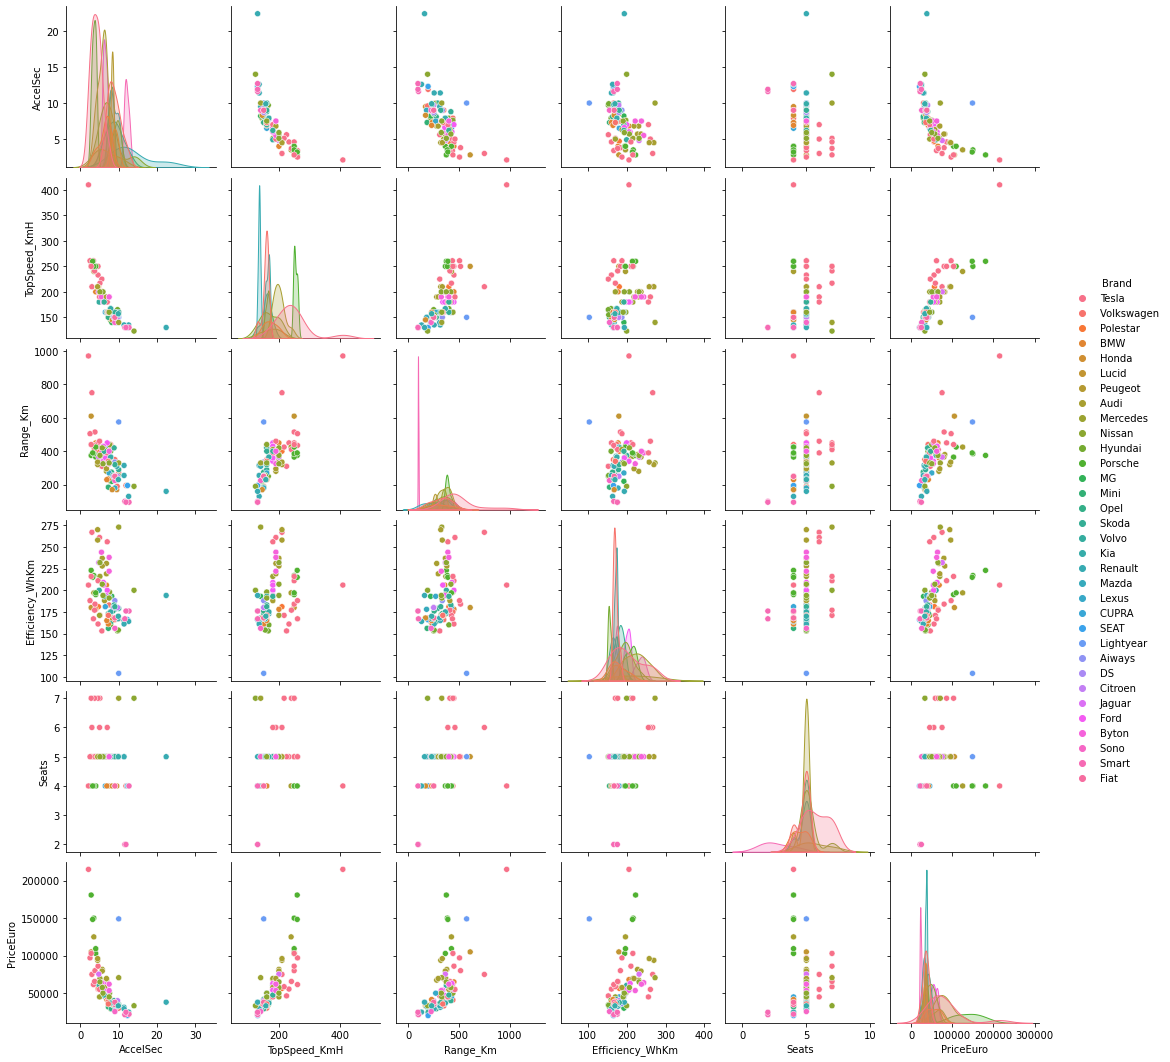

In [12]:
sb.pairplot(df,hue='Brand')

### From the picture abowe, we can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis. The main-diagonal subplots are the univariate histograms (distributions) for each attribute. So, in this pareplot TopSpeed_KmH is highly correlation with PriceEuro and AccelSec. 

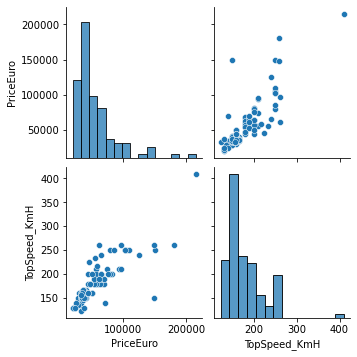

In [13]:
#Plot subplots using pairplot using “vars”
import seaborn as sns
sns.pairplot(df, vars=["PriceEuro","TopSpeed_KmH"])

### Heatmap to show the correlation of the data

<AxesSubplot:>

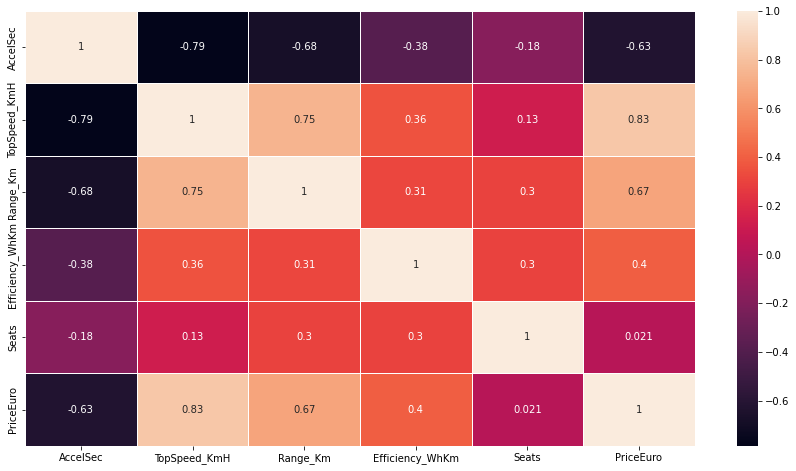

In [14]:
# Generating correlation matrix using Seaborn library
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

### TopSpeed_KmH is highly correlated with PriceEuro and also correlated with AccelSec. PriceEuro is the target variables which is highly correlated with TopSpeed_KmH

### Cars and their body style

Text(0.5, 1.0, 'Body Style')

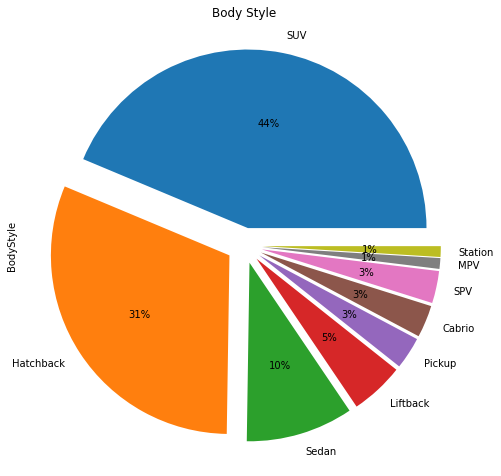

In [15]:
# display the body style 
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

### Top speeds achieved by the cars of a brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

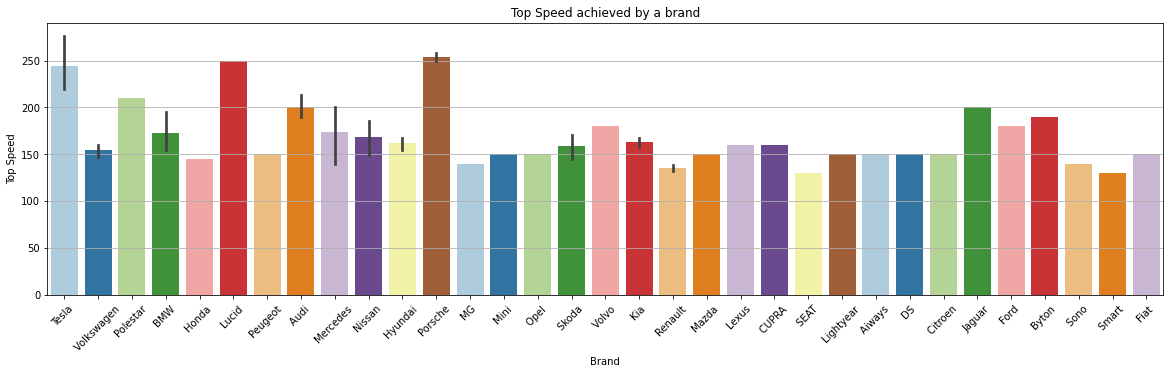

In [16]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

#### Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest

### Car Efficiency 

#### Byton , Jaguar and Audi are the most efficient and Lightyear the least

### Price of cars (in Euro)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

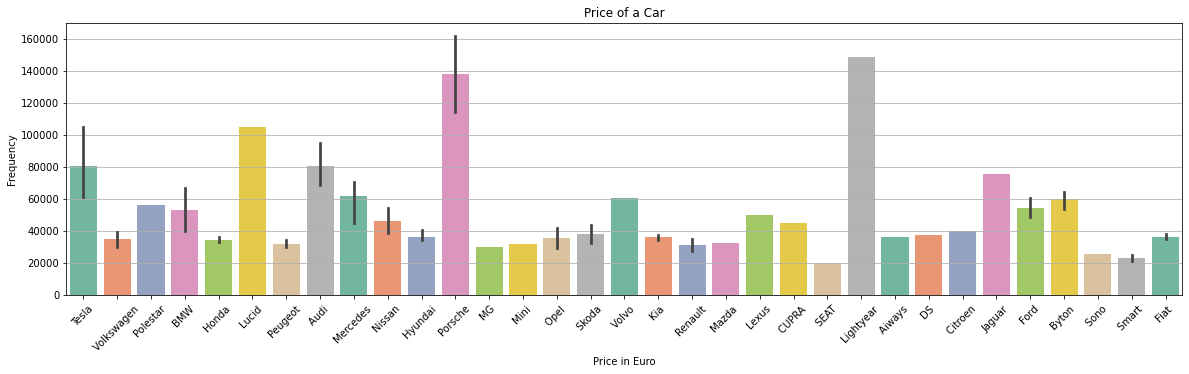

In [17]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='PriceEuro',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

#### Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

### Car efficiency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

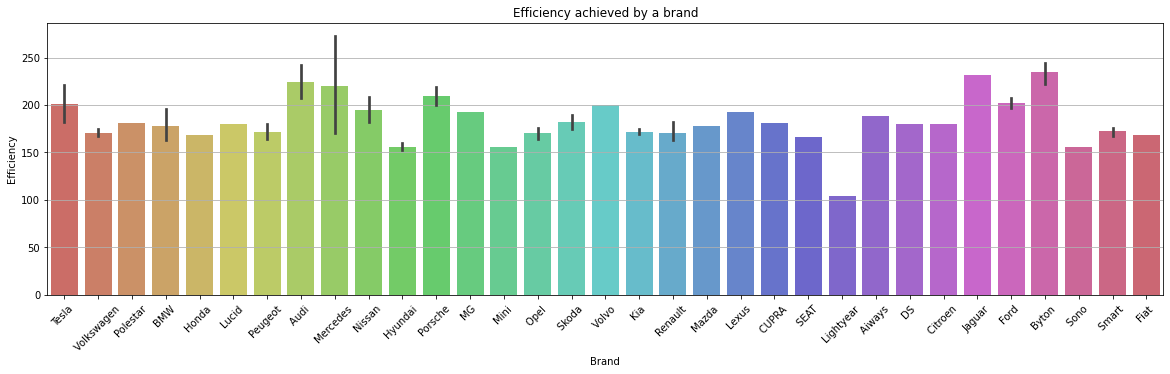

In [18]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

#### Byton , Jaguar and Audi are the most efficient and Lightyear the least

## Build and evaluate the models
- linear Regression using OLS method
 - Split the data into a training and test set, where the “PriceEuro” column is the target.

In [19]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [20]:
#split it into train and test set
x = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km','Efficiency_WhKm']]
y = df['PriceEuro']

In [21]:
x

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm
0,4.6,233,450,161
1,10.0,160,270,167
2,4.7,210,400,181
3,6.8,180,360,206
4,9.5,145,170,168
...,...,...,...,...
98,7.5,160,330,191
99,4.5,210,335,258
100,5.9,200,325,194
101,5.1,200,375,232


In [22]:
y

0      55480
1      30000
2      56440
3      68040
4      32997
       ...  
98     45000
99     96050
100    50000
101    65000
102    62000
Name: PriceEuro, Length: 103, dtype: int64

In [23]:
# Importing trained test method
from sklearn.model_selection import train_test_split

In [24]:
# Use trained test method
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state=43) 

In [25]:
len(x_train)

82

In [26]:
len(x_test)

21

In [27]:
x_train

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm
12,7.9,167,400,160
37,6.5,160,425,181
97,7.5,190,325,222
38,9.5,140,310,168
95,7.3,160,340,171
...,...,...,...,...
58,9.7,150,250,180
21,5.1,217,425,171
49,9.0,150,335,188
64,7.0,180,450,200


In [28]:
x_test

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm
20,8.1,150,275,164
2,4.7,210,400,181
15,7.9,160,440,175
22,10.0,160,290,179
98,7.5,160,330,191
83,6.6,180,360,194
69,6.0,180,430,209
55,8.3,145,170,168
11,7.9,144,220,164
81,2.8,250,440,216


In [29]:
#create a simple pipeline using the Pipeline() class
pipe = Pipeline([('scaler', StandardScaler()), ('clf',LogisticRegression())])

In [30]:
#from sklearn.model_selection import StratifiedKFold 
#skf = StratifiedKFold(n_splits=10)

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:

#Model fitting with K-cross Validation and GridSearchCV
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


In [33]:
print(grid_search.best_params_)

{'n_neighbors': 12}


In [34]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 4.88%


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [36]:
#Checking Accuracy on Test Data
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(x, y)

y_test_hat=knn.predict(x_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 9.52%


In [37]:
#Plotting a Confusion Matrix
#plot_confusion_matrix(grid,x_train, y_train,values_format='d' )

In [38]:
#plot_confusion_matrix(grid,x_test, y_test,values_format='d' )

In [39]:
#fit the pipeline to the data
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [40]:
score = pipe.score(x_test, y_test)
print(score)

0.047619047619047616


In [41]:
#########################

In [42]:
# Importing trained test method
from sklearn.model_selection import train_test_split

In [43]:
# Importing trained test method
from sklearn.model_selection import train_test_split

In [44]:
len(x_train)

82

In [45]:
len(x_test)

21

In [46]:
x_train

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm
12,7.9,167,400,160
37,6.5,160,425,181
97,7.5,190,325,222
38,9.5,140,310,168
95,7.3,160,340,171
...,...,...,...,...
58,9.7,150,250,180
21,5.1,217,425,171
49,9.0,150,335,188
64,7.0,180,450,200


In [47]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [49]:
clf.fit(x_train,y_train)

LinearRegression()

In [50]:
clf.predict(x_test)

array([ 34537.17647126,  74323.85723755,  49025.48729361,  45669.7766933 ,
        45726.51558705,  58436.46202383,  62658.71790326,  27652.75023473,
        28209.37583827, 102455.67653749,  59676.84957649,  65146.23759589,
        75438.33236979,  87824.85697272,  73747.38536872,  69141.90101828,
       105306.7503497 ,  43251.6024284 ,  35118.35014687,  24868.51036903,
        49990.88605777])

In [51]:
y_test

20     29146
2      56440
15     40936
22     35000
98     45000
83     46900
69     62900
55     35921
11     29234
81    102990
9      55000
39     45000
67     55000
0      55480
93     57500
13     65000
5     105000
1      30000
94     37900
57     24790
45     36837
Name: PriceEuro, dtype: int64

In [52]:
clf.score(x_test,y_test)

0.6451097669131041

 - Accureacy of this model is 64%

## Run a linear regression and report the R2-value and RMSE on the test set.

In [53]:
# Making predection from our model
predictions = clf.predict(x_test)

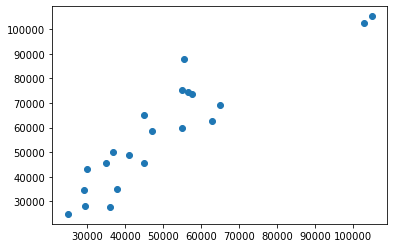

In [54]:
# Plot the two arrays using a scatterplot
plt.scatter(y_test, predictions)

(array([1., 0., 1., 3., 2., 3., 3., 3., 4., 1.]),
 array([-32344.85697272, -28283.54629892, -24222.23562512, -20160.92495133,
        -16099.61427753, -12038.30360373,  -7976.99292993,  -3915.68225613,
           145.62841767,   4206.93909147,   8268.24976527]),
 <BarContainer object of 10 artists>)

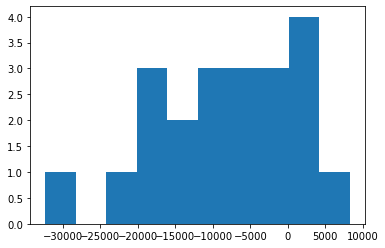

In [55]:
# Another way to visually assess the performance of our model
plt.hist(y_test - predictions)

In [56]:
import  scipy.signal.signaltools

In [57]:
from scipy.signal._signaltools import _centered


In [58]:
import statsmodels.api as sm

In [59]:
X = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km','Efficiency_WhKm']]
Y = df['PriceEuro']
X = sm.add_constant(X)
model = sm. OLS(Y,X).fit()
predictions = model.predict(X)

In [60]:
# Calculate R2
print_model = model.summary()
print(print_model)
predictions

                            OLS Regression Results                            
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     60.28
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.37e-25
Time:                        10:53:36   Log-Likelihood:                -1156.8
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      98   BIC:                             2337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.051e+05    2.3e+04     

0      84852.734801
1      42103.658345
2      71866.459465
3      58643.436072
4      28520.265393
           ...     
98     44113.608057
99     80181.054998
100    66541.333439
101    72705.363227
102    71930.014642
Length: 103, dtype: float64

In [61]:
# import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [62]:
# Calculate RMSE
print('RMSE:'+str(np.sqrt(mean_squared_error(predictions,Y))))

RMSE:18260.387262225824


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.93118617,  1.24088078,  0.88686204, -0.95724726],
       [ 0.86716712, -0.44265992, -0.54853056, -0.75332488],
       [-0.89788333,  0.71045015,  0.48814187, -0.27750601],
       [-0.19852372,  0.0185841 ,  0.16916574,  0.57217054],
       [ 0.70065293, -0.78859295, -1.34597089, -0.71933782],
       [-1.53063726,  1.6329382 ,  2.16276657, -0.31149308],
       [ 0.73395576, -0.67328194, -1.18648282, -0.71933782],
       [ 0.23441318, -0.67328194, -0.50865854, -0.85528607],
       [-0.59815778,  1.05638317, -0.22955443, -1.22914376],
       [-0.36503791,  0.0185841 ,  0.48814187,  0.13033873],
       [-0.76467197,  0.0185841 ,  0.24890977,  0.91204116],
       [ 0.16780751, -0.81165515, -0.94725073, -0.85528607],
       [ 0.16780751, -0.28122451,  0.48814187, -0.99123432],
       [-1.1310032 ,  0.47982813,  0.88686204, -0.3794672 ],
       [ 0.7672586 , -0.32734892, -0.70801863, -1.22914376],
       [ 0.16780751, -0.44265992,  0.80711801, -0.48142839],
       [-1.53063726,  1.

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.047619047619047616

In [68]:
X.shape

(103, 5)

In [69]:
# Initialize a logistic regression model 
logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# Train the model
logistic = logistic.fit(x_train, y_train)
# Print score of model(using test dataset)
#print(logistic.score(x1_test, y1_test))

In [70]:
# Create a confusion matrix for the test set predictions
#y_pred_forest  = forest.predict(x1_test)
y_pred_logistic  = logistic.predict(x_train)

In [71]:
#Finding out the linear regression using OLS method
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [72]:
#Fitting the model and summarizing
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     60.28
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.37e-25
Time:                        10:53:36   Log-Likelihood:                -1156.8
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      98   BIC:                             2337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.051e+05    2.3e+04     -4.578      0.000   -1.51e+05   -5.96e+04
AccelSec         1482.2127   1033.219      1.435      0.155    -568.178    3532.603
TopSpeed_KmH      613.9243     78.224      7.848      0.000     458.691     769.157
Range_Km           37.7714     22.680      1.665      0.099      -7.236      82.779
Efficiency_WhKm   143.7166     68.228      2.106      0.038       8.320     279.113
==============================================================================
Omnibus:                       94.859   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1049.593
Skew:                           2.978   Prob(JB):                    1.21e-228
Kurtosis:                      17.460   Cond. No.                     5.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 - Only Top Speed and Efficieny are the two variables related to price

## Importing train test split from Scikit Learn

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

## Importing Linear regression



In [75]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [76]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [77]:
#Finding out the R-squared value
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

78.35225979903608


- Around 78% of the dependant variable has been explained by the independant variables

Coefficients:  [427.4297895  -38.60326281 711.40780336 371.28905011]
Variance score: 0.4885529030998087


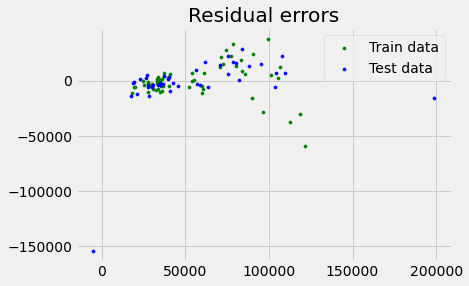

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

  
# defining feature matrix(X) and response vector(y)
X=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm']]
y=df['PriceEuro']

  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
  

# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error
  
# setting plot style
plt.style.use('fivethirtyeight')
  
# plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
# plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
# plotting legend
plt.legend(loc = 'upper right')
  
# plot title
plt.title("Residual errors")
  
# method call for showing the plot
plt.show()

 - In the above plot, I determine the accuracy score using Explained Variance Score.
 - Variance score is around .5
 - The best possible score is 1.0, lower values are worse

##  Logistic Regression

In [79]:
# Import the necessary packages to perform logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [80]:
#Putting Yes value as 1 and No value as 0 for Logistic Regression

df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [81]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [82]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [83]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()


In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

### Confusion Matrix of the regression

In [86]:
# Create a confusion matrix for the test set predictions
y_pred_logistic  = logistic.predict(x_train)

In [87]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

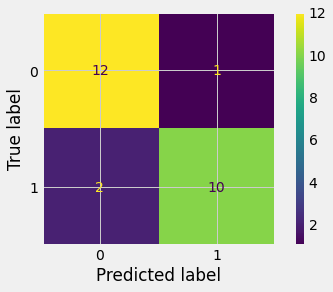

In [88]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

In [89]:
#Finding out the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y1_test,pred1)
score*100

95.23809523809523

- Data is accurate upto 95%